In [33]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import fetch_kddcup99
%matplotlib inline

In [20]:
dataset = fetch_kddcup99(subset=None, shuffle=True, percent10=True)
# http://www.kdd.org/kdd-cup/view/kdd-cup-1999/Tasks
X = dataset.data
y = dataset.target

In [21]:
feature_cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
X = pd.DataFrame(X, columns = feature_cols)

y = pd.Series(y)

In [22]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,255,1,0,1,0,0,0,0,0
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1,0,1,0,0,0,0,0
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1,0,1,0,0,0,0,0
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1,0,1,0,0,0,0,0
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1,0,1,0,0,0,0,0


In [23]:
for col in X.columns:  # turn whatever columns into floats that we can
    try:
        X[col] = X[col].astype(float)
    except ValueError:
        pass

In [24]:
X = pd.get_dummies(X, prefix=['protocol_type_', 'service_', 'flag_'], drop_first=True)

In [25]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag__REJ,flag__RSTO,flag__RSTOS0,flag__RSTR,flag__S0,flag__S1,flag__S2,flag__S3,flag__SF,flag__SH
0,0.0,520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
y.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
dtype: int64

In [35]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

treeclf = DecisionTreeClassifier(max_depth=7)

scores = cross_val_score(treeclf, X, y, scoring='accuracy', cv=5)

print np.mean(scores)

treeclf.fit(X, y)

0.9955204407492013


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
# create a Graphviz file
export_graphviz(treeclf, out_file='tree_kdd.dot', feature_names=X.columns)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_kdd.dot -o tree_kdd.png

<img src="tree_kdd.png">

In [31]:
pd.DataFrame({'feature':X.columns, 'importance':treeclf.feature_importances_}).sort_values('importance', ascending=False).head(10)

,feature,importance
20,srv_count,0.633722
25,same_srv_rate,0.341769
9,num_compromised,0.013613
31,dst_host_diff_srv_rate,0.010738
1,src_bytes,0.000158
85,service__red_i,0.000000
84,service__private,0.000000
83,service__printer,0.000000
82,service__pop_3,0.000000
75,service__netstat,0.000000


In [39]:
# How about a Random Forest?
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

scores = cross_val_score(rf, X, y, scoring='accuracy', cv=5)

print np.mean(scores)  # nicer

rf.fit(X, y)

0.9997307783262454


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
# more spread out importances than a single decision tree
pd.DataFrame({'feature':X.columns, 'importance':rf.feature_importances_}).sort_values('importance', ascending=False).head(10)

,feature,importance
53,service__ecr_i,0.278599
25,same_srv_rate,0.129464
20,srv_count,0.108782
1,src_bytes,0.101766
113,flag__SF,0.073368
109,flag__S0,0.058412
19,count,0.055665
29,dst_host_srv_count,0.038069
38,protocol_type__tcp,0.036816
30,dst_host_same_srv_rate,0.026287


# Anomoly Detection
“An outlier is an observation in a data set which appears to be inconsistent with the remainder of that set of data.”

- Supervised Anomoly Detection

    - Labels available for both normal data and anomalies
    - Similar to rare class mining / imbalanced classification

- Unsupervised Anomoly Detection (Outlier Detection)
    - no labels, training set = normal + abnormal data • Assumption: anomalies are very rare

- Semi-supervised Anomoly Detection (Novelty Detection)
    - Only normal data available to train
    - The algorithm learns on normal data only

## Isolation Forest

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies

In [41]:
# Supervised and Outlier Detection with KDD

# In this example, we will want to use binary data where 1 will represent a "not-normal" attack

In [42]:
from sklearn.model_selection import train_test_split

y_binary = y != 'normal.'

In [43]:
y_binary.head()


0    True
1    True
2    True
3    True
4    True
dtype: bool

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary)


In [45]:
y_test.value_counts(normalize=True)  # check our null accuracy


True     0.80388
False    0.19612
dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)  # make a single test train split


model = IsolationForest()
model.fit(X_train)  # notice that there is no y in the .fit


IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [47]:
y_predicted = model.predict(X_test)

pd.Series(y_predicted).value_counts()


 1    111053
-1     12453
dtype: int64

In [49]:
y_predicted = np.where(y_predicted==1, 1, 0)  # turn into 0s and 1s

pd.Series(y_predicted).value_counts()  # that's better


1    111053
0     12453
dtype: int64

In [50]:
scores = model.decision_function(X_test)


In [51]:
scores  # the smaller, the more anomolous


array([-0.02825592,  0.05686285,  0.05351232, ...,  0.05433025,
        0.11105752,  0.11105752])

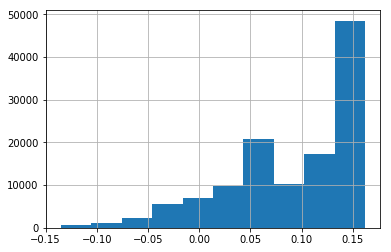

In [52]:
pd.Series(scores).hist()


In [53]:
preds = np.where(scores < 0, 0, 1)  # customize threshold
accuracy_score(preds, y_test)

NameError: name 'accuracy_score' is not defined

In [ ]:
for t in (-2, -.15, -.1, -.05, 0, .05):
    preds = np.where(scores < t, 0, 1)  # customize threshold
    print t, accuracy_score(preds, y_test)

In [ ]:
## -0.05 0.816988648325 gives us better than the null accuracy, without ever needing the testing set
# This shows how we can can achieve predictive results without labeled data


# This is an interesting use case of novelty detection becuase generally, when given labels
# we do not use such tactics.